Практическая 2

Задание 1 - граф

Корень в интервале: [-4.459, -4.449]
Корень в интервале: [-0.917, -0.907]
Корень в интервале: [0.711, 0.721]


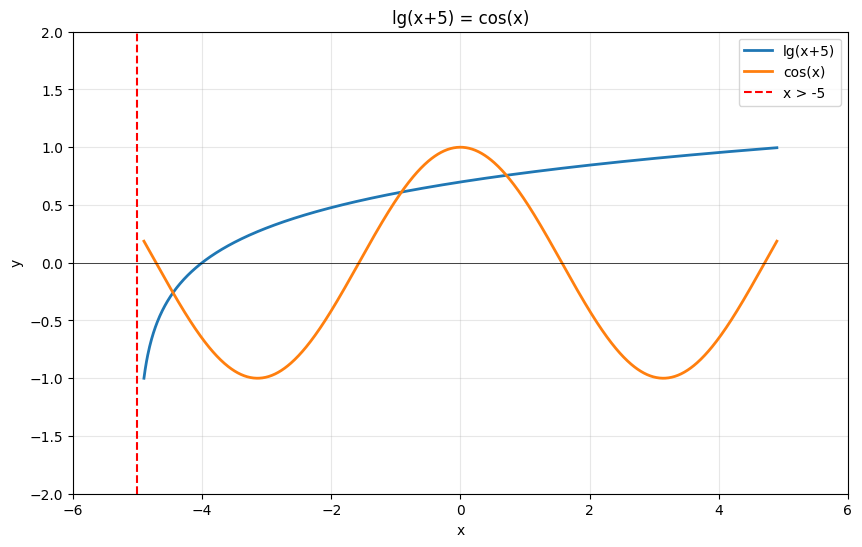

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    return math.log10(x + 5) - math.cos(x)

def f1(x):
    return np.log10(x + 5)

def f2(x):
    return np.cos(x)

x_vals = np.linspace(-4.9, 4.9, 1000)

y1_vals = f1(x_vals)
y2_vals = f2(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_vals, label='lg(x+5)', linewidth=2)
plt.plot(x_vals, y2_vals, label='cos(x)', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(-5, color='red', linestyle='--', label='x > -5')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('lg(x+5) = cos(x)')
plt.legend()
plt.xlim(-6, 6)
plt.ylim(-2, 2)

diff = y1_vals - y2_vals
sign_changes = np.where(np.diff(np.sign(diff)))[0]

roots_intervals = []
for idx in sign_changes:
    x1, x2 = x_vals[idx], x_vals[idx+1]
    if x2 < 5:
        roots_intervals.append((x1, x2))
        print(f"Корень в интервале: [{x1:.3f}, {x2:.3f}]")

plt.legend()
plt.show()

Задание 2 - метод половинного деления

In [26]:
def f(x):
    return math.log10(x + 5) - math.cos(x)
a, b, eps, n = 0.6, 0.8, 0.001, 0
while b - a > eps:
    c = (a + b) / 2
    if f(a) * f(c) <= 0:
        b = c
    else:
        a = c
    n += 1


print(f"Номер итерации: {n}")
print(f"Корень: x = {c:.6f}")
print(f"F(x) = lg(x+5) - cos(x) = {f(c):.6f}")


Номер итерации: 8
Корень: x = 0.711719
F(x) = lg(x+5) - cos(x) = -0.000474


Практическая 4

Задание 1 - граф

Корень в интервале: [-4.459, -4.449]
Корень в интервале: [-0.917, -0.907]
Корень в интервале: [0.711, 0.721]


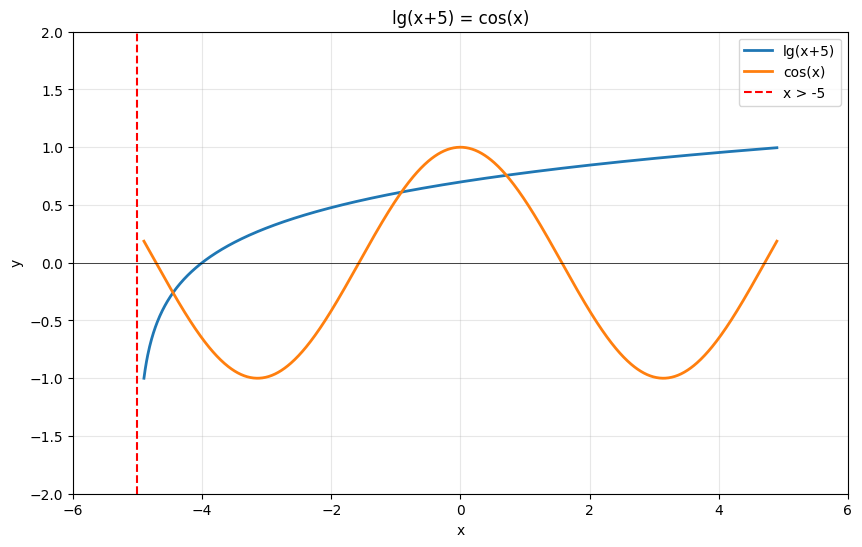

In [27]:
def f1(x):
    return np.log10(x + 5)

def f2(x):
    return np.cos(x)

x_vals = np.linspace(-4.9, 4.9, 1000)

y1_vals = f1(x_vals)
y2_vals = f2(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1_vals, label='lg(x+5)', linewidth=2)
plt.plot(x_vals, y2_vals, label='cos(x)', linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(-5, color='red', linestyle='--', label='x > -5')
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('lg(x+5) = cos(x)')
plt.legend()
plt.xlim(-6, 6)
plt.ylim(-2, 2)

diff = y1_vals - y2_vals
sign_changes = np.where(np.diff(np.sign(diff)))[0]

roots_intervals = []
for idx in sign_changes:
    x1, x2 = x_vals[idx], x_vals[idx+1]
    if x2 < 5:
        roots_intervals.append((x1, x2))
        print(f"Корень в интервале: [{x1:.3f}, {x2:.3f}]")

plt.legend()
plt.show()

Задание 2 - метод хорд

In [32]:
def F(x):
    return (1/(x+5*math.log(10))) + math.sin(x)
def dF(x):
    return -(1/((x+5)**2 * math.log(10))) + math.cos(x)
a, b, eps = 0.6, 0.8, 0.001

fa = F(a)
fb = F(b)
if fa * F(a) > 0:
    c = a
    x0 = b
else:
    c = b
    x0 = a

n = 0
xN = x0
xNew = c
fNew = f(xNew)

while True:
    fN = f(xN)
    x_next = xN - fN * (xN - xNew) / (fN - fNew)
    
    print(f"Номер итерации {n+1}: x = {x_next:.6f}, f(x) = {f(x_next):.6f}")
    
    if abs(x_next - xN) < eps:
        break
    
    xN = x_next
    n += 1

print(f"Номер итераций: {n + 1}")
print(f"Корень: x = {x_next:.6f}")
print(f"F(x) = lg(x+5) - cos(x) = {f(x_next):.6f}")


Номер итерации 1: x = 0.707247, f(x) = -0.003727
Номер итерации 2: x = 0.712691, f(x) = 0.000236
Номер итерации 3: x = 0.712348, f(x) = -0.000015
Номер итераций: 3
Корень: x = 0.712348
F(x) = lg(x+5) - cos(x) = -0.000015


Задание 3 - метод касательных

In [33]:
a, b, eps, n = 0.6, 0.8, 0.001, 1

if f(a) * dF(a) > 0:
    x0 = a
elif f(b) * dF(b) > 0:
    x0 = b
else:
    x0 = (a + b) / 2

x = x0
m = min(abs(F(a)), abs(F(b)))

print(f"Номер итерации {n}: x = {x:.6f}, f(x) = {f(x):.6f}")
while True:
    x_next = x - f(x) / F(x)
    fN = f(x_next)

    print(f"Номер итерации {n+1}: x = {x_next:.6f}, f(x) = {fN:.6f}")

    x = x_next
    n += 1
    
    if abs(fN) / m < eps:
        break


print(f"Еомер итерации: {n}")
print(f"Корень: x = {x_next:.6f}")
print(f"F(x) = lg(x+5) - cos(x) = {f(x_next):.6f}")


Номер итерации 1: x = 0.800000, f(x) = 0.066721
Номер итерации 2: x = 0.716449, f(x) = 0.002984
Номер итерации 3: x = 0.712408, f(x) = 0.000029
Еомер итерации: 3
Корень: x = 0.712408
F(x) = lg(x+5) - cos(x) = 0.000029
